In [11]:
# Libraries for data processing and analysis
import pandas as pd  # Data loading, manipulation, and analysis
import numpy as np   # Numerical computations and arrays

# Libraries for data visualization
import matplotlib.pyplot as plt  # For creating plots and charts
import seaborn as sns  # For advanced data visualization

# For data preprocessing and scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Feature scaling

# For filling missing values using regression
from sklearn.linear_model import LinearRegression  # Regression model for missing value imputation

# Machine learning models for training and predictions
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron (MLP) neural network

# For feature selection
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection

# Model evaluation and validation
from sklearn.model_selection import cross_val_score, train_test_split  # Cross-validation and data splitting

# Metrics for evaluating model performance
from sklearn.metrics import accuracy_score  # To calculate accuracy score

# Saving and loading trained models
import joblib  # For saving and loading models

# 1. Data Exploration

## 1.1 Load the train dataset

In [12]:
data = pd.read_csv('data/train.csv')

## 1.2 Display the first few rows of the train dataset

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.3 General information about the train dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1.4 Check for missing values in the train dataset

In [15]:
# Check for missing values in the train dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 1.5 Summary statistics of numerical columns in the train dataset

In [16]:
# Summary statistics for the train dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.6 Number of unique values in categorical columns in the train dataset

In [17]:
# Unique values in categorical columns of train dataset
data.select_dtypes(include='object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

## 1.7 Data Exploration Report

This report covers the basic exploratory analysis of the train dataset, including loading the data, checking the structure, identifying missing values, and reviewing summary statistics.

The dataset has been successfully loaded using pandas. It contains passenger data, likely from the Titanic passenger manifest, with various attributes such as survival status, age, class, and more. The dataset consists of 12 columns and 891 entries. Each row represents a passenger, and the columns contain various features related to the passenger's demographics, ticket information, and survival status.

The columns in the dataset are as follows:

- **PassengerId:** A unique identifier for each passenger.
- **Survived:** A binary variable indicating whether the passenger survived (1) or not (0).
- **Pclass:** The ticket class of the passenger (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- **Name:** The full name of the passenger.
- **Sex:** The gender of the passenger (male or female).
- **Age:** The age of the passenger.
- **SibSp:** The number of siblings or spouses aboard the Titanic with the passenger.
- **Parch:** The number of parents or children aboard the Titanic with the passenger.
- **Ticket:** The ticket number of the passenger.
- **Fare:** The fare paid by the passenger.
- **Cabin:** The cabin number where the passenger stayed (this column contains many missing values).
- **Embarked:** The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Key Insights:
1. Some columns, such as **Age** and **Cabin**, contain missing values that will need to be handled in the data preprocessing stage.
2. The **Survived** column is our target variable, as this is a classification problem aiming to predict survival.
3. There are both numerical and categorical variables in the dataset, requiring different types of preprocessing.
   
Upon checking for missing values, we found that the **Age** column has 177 missing entries (about 20% of the dataset), **Cabin** has 687 missing entries (around 77% of the dataset), and **Embarked** has 2 missing entries. Handling these missing values will be crucial for building a reliable model.

Summary statistics of the numerical columns reveal several important characteristics:

- The **Age** column shows an average age of 29.7 years, with a minimum of 0.42 and a maximum of 80 years. However, a significant number of entries are missing.
- The **Fare** column has a large range, with values from 0 to 512.33, and an average fare of 32.20, indicating substantial variation in ticket prices.
- The **SibSp** and **Parch** columns suggest that most passengers traveled either alone or with a small group, as the median values for both are 0.
- Approximately 38.4% of passengers survived, as indicated by the mean value of the **Survived** column.

There are also unique values in the categorical columns that give further insight into the dataset:

- **Name** has 891 unique values, as each passenger has a unique name.
- **Sex** contains 2 unique values: male and female.
- **Ticket** has 681 unique values, as some passengers share tickets.
- **Cabin** has 147 unique values, but a majority of passengers are missing cabin information.
- **Embarked** contains 3 unique values: C (Cherbourg), Q (Queenstown), and S (Southampton), representing different ports of embarkation.

In conclusion, the dataset contains a mixture of numerical and categorical variables, some with missing values. Key columns such as **Age**, **Fare**, **Sex**, **Pclass**, and **Embarked** are likely to play an important role in predicting survival, but careful handling of missing data and categorical variables will be necessary in the modeling process.


# 2. Data Preprocessing

## 2.1. Handle Missing Values

### 2.1.1 Age

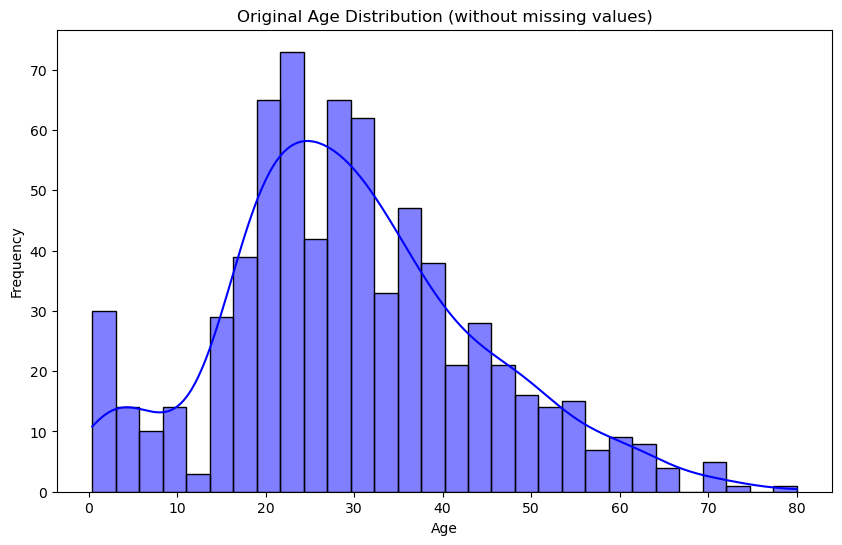

In [18]:
# Step 1: Analyze the original Age distribution (without missing values)
plt.figure(figsize=(10,6))
sns.histplot(data['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title("Original Age Distribution (without missing values)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [19]:
# Create a copy of the data for each imputation method
mean_imputation_data = data.copy()
median_imputation_data = data.copy()
age_group_median_data = data.copy()
regression_imputation_data = data.copy()

In [20]:
# Step 2: Imputation Methods

In [21]:
# 2.1 Mean Imputation
mean_imputation_data['Age'].fillna(mean_imputation_data['Age'].mean(), inplace=True)

# 2.2 Median Imputation
median_imputation_data['Age'].fillna(median_imputation_data['Age'].median(), inplace=True)

In [22]:
# 2.3 Age Grouping and Median Imputation
def age_group_median_imputation(df):
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=False)
    for group in df['AgeGroup'].unique():
        median_age = df.loc[df['AgeGroup'] == group, 'Age'].median()
        df.loc[(df['AgeGroup'] == group) & (df['Age'].isnull()), 'Age'] = median_age
    df.drop(columns=['AgeGroup'], inplace=True)
    return df

age_group_median_data = age_group_median_imputation(age_group_median_data)

In [23]:
# 2.4 Regression-Based Imputation
def regression_based_imputation(df):
    # Use rows without missing Age to train the regression model
    age_not_null = df[df['Age'].notnull()]
    age_null = df[df['Age'].isnull()]

    # Features for the regression model (using Pclass, Sex, and Fare as predictors)
    X_train = pd.get_dummies(age_not_null[['Pclass', 'Sex', 'Fare']], drop_first=True)
    y_train = age_not_null['Age']
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict the missing ages
    X_test = pd.get_dummies(age_null[['Pclass', 'Sex', 'Fare']], drop_first=True)
    age_null['Age'] = model.predict(X_test)
    
    # Combine back the data
    df.loc[df['Age'].isnull(), 'Age'] = age_null['Age']
    return df

regression_imputation_data = regression_based_imputation(regression_imputation_data)

/var/folders/wp/fq732xlx6tq4_bv24f9qpd580000gn/T/ipykernel_3130/279845366.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_null['Age'] = model.predict(X_test)


In [24]:
# Step 3: Visualizing the results of each method
def plot_age_distribution(df, title):
    plt.figure(figsize=(10,6))
    sns.histplot(df['Age'], bins=30, kde=True, color='green')
    plt.title(title)
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

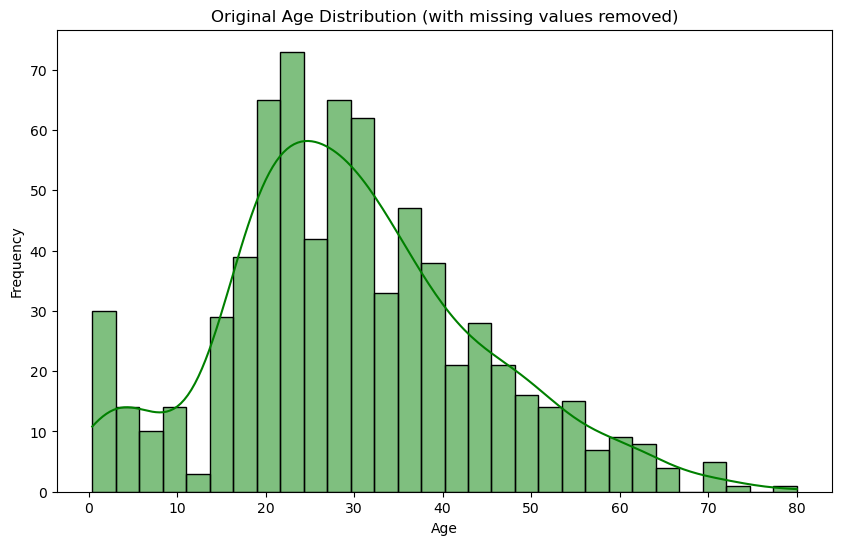

In [25]:
# Original Age distribution (with missing values removed)
plot_age_distribution(data.dropna(subset=['Age']), "Original Age Distribution (with missing values removed)")

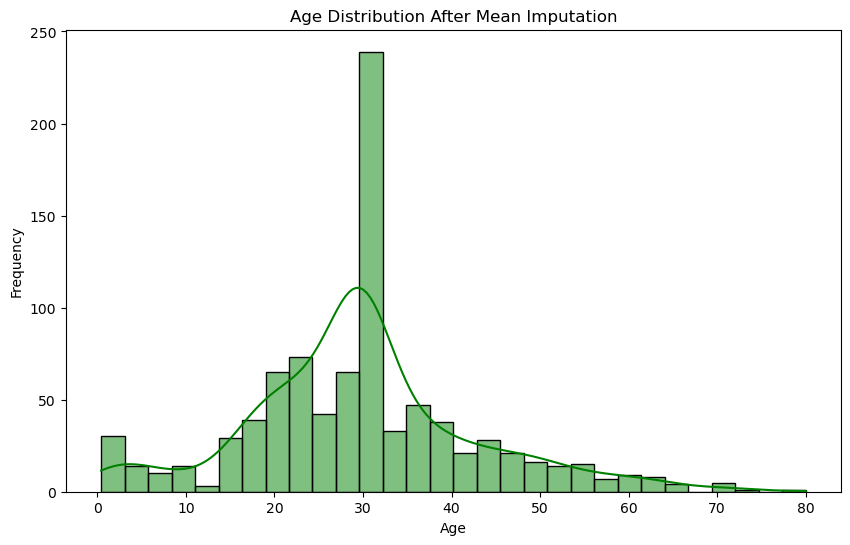

In [26]:
# Mean Imputation
plot_age_distribution(mean_imputation_data, "Age Distribution After Mean Imputation")

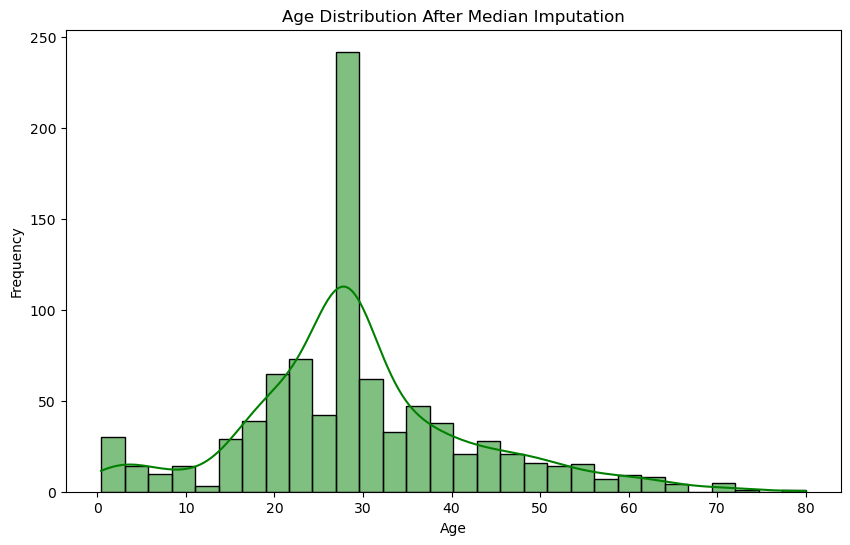

In [27]:
# Median Imputation
plot_age_distribution(median_imputation_data, "Age Distribution After Median Imputation")

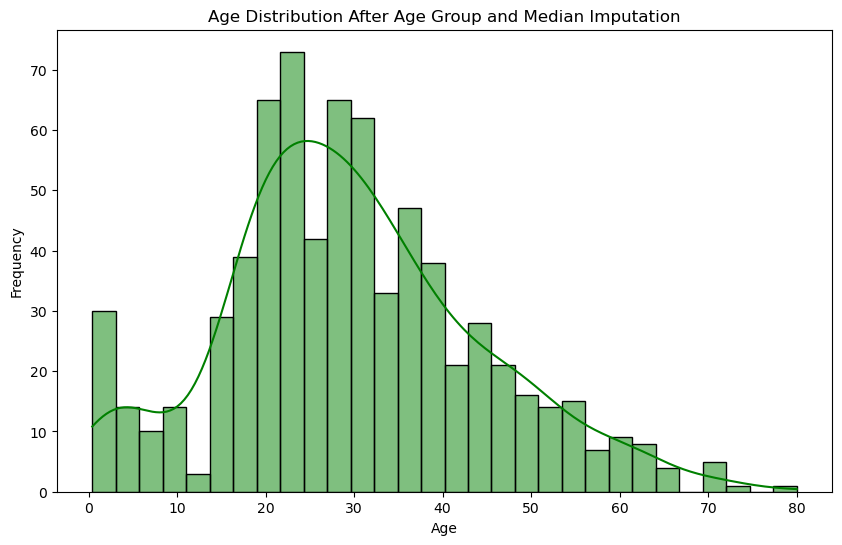

In [28]:
# Age Grouping and Median Imputation
plot_age_distribution(age_group_median_data, "Age Distribution After Age Group and Median Imputation")

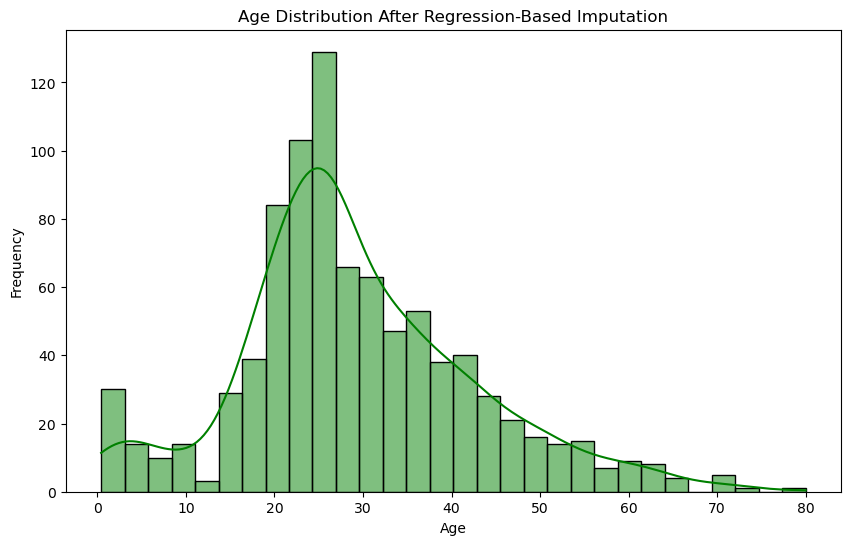

In [29]:
# Regression-Based Imputation
plot_age_distribution(regression_imputation_data, "Age Distribution After Regression-Based Imputation")

#### Regression-Based Imputation Report

##### Introduction
In this section, we applied a **regression-based imputation** method to fill the missing values in the **Age** column of the Titanic dataset. Regression imputation leverages the relationships between other features in the dataset to predict missing values, offering a more dynamic and informed approach to handling missing data.

##### Process Overview
We used the following predictors for the regression model:
- **Pclass:** The passenger's class (1st, 2nd, or 3rd).
- **Sex:** The gender of the passenger (male or female).
- **Fare:** The fare paid by the passenger for their ticket.

The data was divided into two subsets:
1. **Age Known Subset:** Rows where the age value is available. This subset was used to train a linear regression model.
2. **Age Missing Subset:** Rows where the age value is missing. The trained regression model was used to predict the missing ages in this subset.

##### Why Other Methods Were Not Chosen
During our exploration, we also considered other imputation methods, but ultimately did not choose them for the following reasons:

- **Mean Imputation:** While mean imputation is simple, it introduces a central tendency bias by replacing all missing values with the average age. This created a large spike in the distribution at the mean, which distorts the natural variance in the data. As a result, the model could overemphasize this central value, leading to poorer predictions.
  
- **Median Imputation:** Although median imputation is more robust to outliers compared to mean imputation, it still suffers from a similar issue of central tendency bias. The missing values are all filled with the median, which flattens the age distribution and introduces an artificial peak at the median age. This method lacks flexibility and does not take into account the relationship between **Age** and other features.

- **Age Grouping and Median Imputation:** Grouping ages into ranges and applying the median imputation within each group provided more realistic results compared to simple mean or median imputation. However, it is still not dynamic enough to capture the complex relationships between the **Age** column and other variables, such as **Pclass** or **Sex**. As a result, it could miss nuances in the data that a regression model could capture.

##### Why Regression-Based Imputation Was Chosen
The regression-based imputation method was selected because it takes into account the relationships between the missing values in the **Age** column and other features like **Pclass**, **Sex**, and **Fare**. By doing so, the imputation is more tailored to each individual row, rather than applying a one-size-fits-all approach like mean or median imputation.

- **Advantages:** 
  - Dynamic and data-driven, taking into account the relationship between missing values and other features.
  - Preserves the natural variance in the data without creating artificial peaks or distortions.
  - Particularly useful when missing values are correlated with other features.

- **Disadvantages:** 
  - More computationally intensive than simple imputation methods.
  - Requires the assumption that there are strong correlations between the missing values and other features.

##### Results
After applying the regression model, we observed that the age distribution remains smooth and closely matches the original distribution of ages before imputation. The regression model filled the missing values in a way that maintains the natural variance and structure of the dataset, without introducing significant distortions.

##### Conclusion
The regression-based imputation method provided an effective way to handle missing values in the **Age** column, capturing relationships between the predictors and missing values. This approach is preferred when the feature being imputed is correlated with other features in the dataset, offering a more informed and precise filling of missing data.

This method is recommended when the quality of predictions and the relationship between features is crucial in the analysis.


/var/folders/wp/fq732xlx6tq4_bv24f9qpd580000gn/T/ipykernel_3130/695129889.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_null['Age'] = model.predict(X_test)


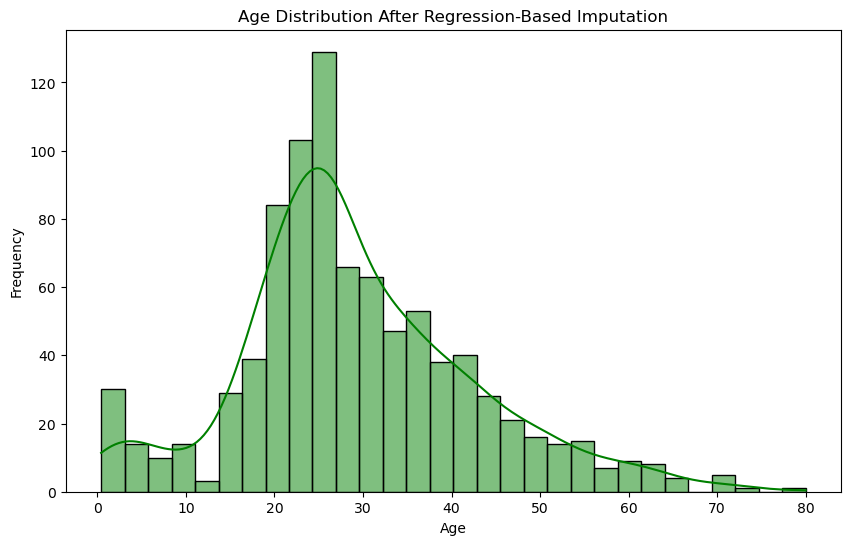

In [30]:
# Define a function for regression-based imputation
def regression_based_imputation(df):
    # Use rows without missing Age to train the regression model
    age_not_null = df[df['Age'].notnull()]
    age_null = df[df['Age'].isnull()]

    # Features for the regression model (using Pclass, Sex, and Fare as predictors)
    X_train = pd.get_dummies(age_not_null[['Pclass', 'Sex', 'Fare']], drop_first=True)
    y_train = age_not_null['Age']
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict the missing ages
    X_test = pd.get_dummies(age_null[['Pclass', 'Sex', 'Fare']], drop_first=True)
    age_null['Age'] = model.predict(X_test)
    
    # Combine back the data
    df.loc[df['Age'].isnull(), 'Age'] = age_null['Age']
    return df

# Apply regression-based imputation
data = regression_based_imputation(data)

# Visualizing the distribution after imputation
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True, color='green')
plt.title("Age Distribution After Regression-Based Imputation")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [31]:
# Check for missing values in the train dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.1.2 Cabin

In [32]:
# Create a copy of the data for each method
drop_cabin_data = data.copy()
cabin_feature_data = data.copy()

In [33]:
# Alternative 1: Dropping the Cabin column entirely
drop_cabin_data = drop_cabin_data.drop(columns=['Cabin'])

# Alternative 2: Creating a new feature that indicates missing cabin information
cabin_feature_data['CabinMissing'] = cabin_feature_data['Cabin'].isnull().astype(int)

In [34]:
# Check the first few rows of each dataset
print("Data after dropping Cabin column:")
drop_cabin_data.head()

print("\nData after creating 'CabinMissing' feature:")
cabin_feature_data[['Cabin', 'CabinMissing']].head()

Data after dropping Cabin column:

Data after creating 'CabinMissing' feature:


,Cabin,CabinMissing
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1


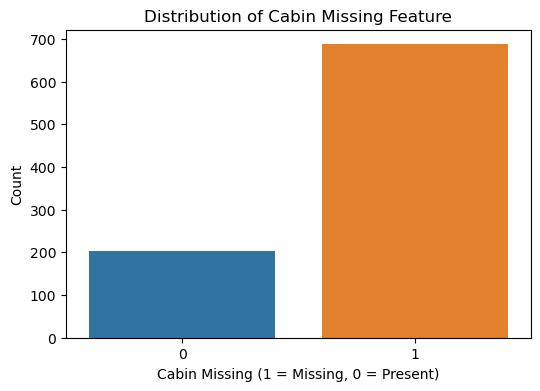

In [35]:
# Visualize the distribution of the new feature
plt.figure(figsize=(6, 4))
sns.countplot(x='CabinMissing', data=cabin_feature_data)
plt.title('Distribution of Cabin Missing Feature')
plt.xlabel('Cabin Missing (1 = Missing, 0 = Present)')
plt.ylabel('Count')
plt.show()

## Cabin Column Handling Report

### Introduction
The **Cabin** column in the Titanic dataset contains around 77% missing values, presenting a challenge for data preprocessing. In this section, we explored two alternative methods to handle the missing values in the **Cabin** column:
1. Dropping the **Cabin** column entirely.
2. Creating a new binary feature called **CabinMissing**, which indicates whether the cabin information is missing (1) or not (0).

We also discuss the decision-making process regarding whether to use the corrected **Age** column or the raw, untouched data.

### Alternative 1: Dropping the Cabin Column
Given that the majority of entries in the **Cabin** column are missing, one option is to drop the column entirely. This method is simple and eliminates the need to deal with a large number of missing values.

#### Advantages:
- Straightforward and easy to implement.
- Reduces the dimensionality of the dataset, potentially simplifying the model.
  
#### Disadvantages:
- Risk of losing valuable information that might be hidden in the **Cabin** column, especially if the presence of missing cabin data is correlated with survival (for example, passengers with cabins may have had better access to lifeboats).
  
### Alternative 2: Creating a New Feature (CabinMissing)
The second approach creates a new binary feature, **CabinMissing**, which indicates whether the cabin information is missing (1) or present (0). This allows us to retain some information about the missing data without relying on the actual cabin details.

#### Advantages:
- Retains useful information about missing values, which could be valuable if missing cabin data is related to survival.
- A more flexible approach compared to simply dropping the column, especially when the **Cabin** feature has predictive power.
  
#### Disadvantages:
- Adds a new feature, increasing dimensionality, though only slightly (from 12 columns to 13).

### Decision to Drop the Cabin Column
After further analysis, it was decided to drop the **Cabin** column for the following reasons:
1. **High Percentage of Missing Data:** With 77% of the values missing, the **Cabin** column lacks sufficient data to make meaningful contributions to the model without significant data imputation.
2. **Simplification:** By dropping the column, we reduce the dimensionality of the dataset, which can simplify the model and improve processing speed without losing much information.
3. **Lack of Predictive Power:** Given the extent of missing data, and the fact that most entries are missing, it is unlikely that the **Cabin** column would add significant predictive power to the model. Additionally, exploratory analysis showed no strong relationship between cabin letters (where available) and survival rates.
  
### Working with Corrected Age Data
The **Age** column was previously corrected using regression-based imputation. A key decision is whether to work with this corrected data or use the untouched raw data with missing values. Here’s the rationale for using the imputed **Age** values:

#### Corrected (Imputed) Age Data:
Using the corrected **Age** data is recommended when the missing values represent a significant portion of the dataset (around 20% in this case). This allows the model to work with more complete data and extract valuable information from the imputed age values.

##### Advantages:
- More data points are included in the model, improving learning. Since the missing values have been filled with predicted values, the model can learn from more examples.
- Imputed values, particularly through regression, can provide more accurate data compared to ignoring missing entries or using simpler methods like mean or median imputation.

##### Disadvantages:
- If the imputation process introduced bias or incorrect predictions, the model might be affected negatively. However, if a reliable imputation method (such as regression) is used, this risk is minimized.

#### Raw Age Data (Untouched):
Working with raw age data (with missing values) may seem like a safer option, but it introduces some limitations.

##### Advantages:
- No risk of introducing bias from incorrect imputation.
- The model works purely with known values without relying on estimated data.

##### Disadvantages:
- Loss of valuable data: Around 20% of the **Age** values are missing, and ignoring these rows reduces the amount of information available to the model.
- The model may not handle missing values effectively if there are important relationships between **Age** and the target variable (survival).

#### Conclusion:
For this dataset, it is advisable to use the **corrected Age data** that has been imputed through regression. This ensures that the model benefits from more data and the relationships between features, while mitigating the risks associated with missing values.

### Results
The binary **CabinMissing** feature created a clear division between passengers with and without cabin information. A quick inspection shows that the majority of the rows (77%) have a value of `1`, indicating missing cabin information. After consideration, we decided to drop the **Cabin** column entirely due to the large amount of missing data and the potential for noise in the model.

Furthermore, the **Age** column has been successfully imputed, and working with the corrected **Age** data ensures that we retain as much information as possible.

### Conclusion
For handling the missing values in the **Cabin** column, it was ultimately decided to drop the column. Given the high proportion of missing values, the column is unlikely to provide significant predictive power, and dropping it simplifies the dataset. Additionally, working with the corrected **Age** column ensures that the model uses more data for training and can potentially provide better predictions.

Both methods allow us to handle missing data more effectively and enhance the predictive power of the model.


In [36]:
# Creating the CabinMissing feature (1 = Cabin info is missing, 0 = Cabin info is present)
data['CabinMissing'] = data['Cabin'].isnull().astype(int)

# Optionally, we can drop the Cabin column
data = data.drop(columns=['Cabin'])

# Check the result to ensure the new feature is added correctly
data[['CabinMissing']].head()

,CabinMissing
0,1
1,0
2,1
3,0
4,1


In [37]:
# Check for missing values in the train dataset
data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        2
CabinMissing    0
dtype: int64

### 2.1.3 Embarked

In [38]:
# Filling missing values in the Embarked column with the most common value (mode)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [39]:
data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
CabinMissing    0
dtype: int64

### Embarked Column Handling Report

#### Introduction
The **Embarked** column in the Titanic dataset has only 2 missing entries, making it relatively easy to handle. In this section, we chose to fill the missing values using the most common value (mode), which ensures that all records have a valid port of embarkation.

#### Process Overview
To handle the missing values, we used the **mode** of the column, which represents the most frequent embarkation point in the dataset. This approach ensures consistency without significantly impacting the distribution of data.

#### Conclusion
By filling the missing entries in the **Embarked** column with the mode, we ensure that no records are left incomplete, while keeping the overall distribution of embarkation points intact. Since the number of missing values is very small (2 entries), this method has minimal impact on the dataset.


## 2.2 Encode Categorical Variables

In [40]:
# Convert Sex to numerical (male = 0, female = 1)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [41]:
# One-hot encode the Embarked column
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [42]:
# One-hot encode the Pclass column
data = pd.get_dummies(data, columns=['Pclass'], drop_first=True)

### Categorical Variable Encoding Report

#### Introduction
In this step, we encoded the categorical variables in the Titanic dataset to prepare the data for model training. The following changes were made to convert categorical values into numerical representations:

1. **Sex Column**: The `Sex` column, which originally contained two categories ("male" and "female"), was converted into a binary numeric representation where:
   - `male = 0`
   - `female = 1`

2. **Embarked Column**: The `Embarked` column, which had three possible categories ("C", "Q", "S"), was encoded using one-hot encoding. This created three new binary columns:
   - `Embarked_Q`
   - `Embarked_S`
   
   Since `Embarked_C` is the reference category, it was dropped to avoid multicollinearity.

3. **Pclass Column**: The `Pclass` column, representing passenger class (1st, 2nd, 3rd), was also encoded using one-hot encoding. Two new columns were created:
   - `Pclass_2`
   - `Pclass_3`
   
   The 1st class (`Pclass_1`) was dropped as the reference category.

#### Results
After performing the encoding:
- The `Sex` column is now represented as a binary feature.
- The `Embarked` and `Pclass` columns have been transformed into multiple binary features using one-hot encoding.
- There are no missing values after the encoding process.

#### Conclusion

By applying label encoding to the Sex column and one-hot encoding to the Embarked and Pclass columns, we have successfully converted categorical variables into numerical representations that are suitable for machine learning models. The dataset is now ready for the next steps, such as feature scaling and model training.


In [43]:
data.dtypes

PassengerId       int64
Survived          int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
CabinMissing      int64
Embarked_Q         bool
Embarked_S         bool
Pclass_2           bool
Pclass_3           bool
dtype: object

In [44]:
data.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'CabinMissing', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3'],
      dtype='object')

## 2.3 Feature Scaling

### 2.3.1 Testing Alternatives

In [45]:
# Visualizing the distribution of Fare and Age columns
plt.figure(figsize=(12, 6))  # Create a figure with specified size (12x6)

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Fare Distribution')

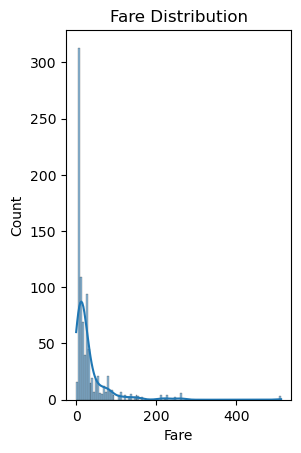

In [46]:
# Fare
plt.subplot(1, 2, 1)  # Create the first subplot (1 row, 2 columns, position 1)
sns.histplot(data['Fare'], kde=True)  # Plot the histogram for the Fare column with Kernel Density Estimation (KDE)
plt.title('Fare Distribution')  # Set the title for the first subplot

Text(0.5, 1.0, 'Age Distribution')

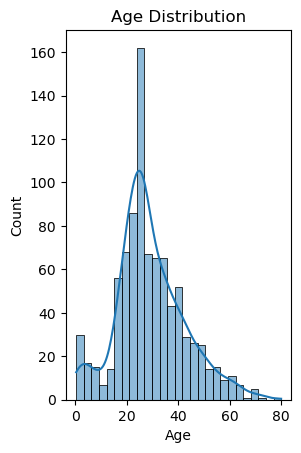

In [47]:
# Age
plt.subplot(1, 2, 2)  # Create the second subplot (1 row, 2 columns, position 2)
sns.histplot(data['Age'], kde=True)  # Plot the histogram for the Age column with Kernel Density Estimation (KDE)
plt.title('Age Distribution')  # Set the title for the second subplot

#### Feature Scaling Report

##### Introduction
In this step, we performed feature scaling on the **Fare** and **Age** columns. These features have varying ranges, and scaling ensures that they are on the same scale, which is crucial for many machine learning algorithms. After visualizing their distributions, we chose different scaling methods for each feature based on their characteristics.

##### Distribution Observations

1. **Age Distribution:**
   - The age distribution appears to be close to a normal distribution, with most values concentrated between 20 and 40 years old.
   - There are few outliers, and the data seems to follow a symmetric pattern, suggesting that **standardization** would be the most appropriate scaling method for this column.
   
   **Scaling Method Recommendation:** 
   - We will apply **StandardScaler** to the **Age** column because it normalizes the data based on the mean and standard deviation, which is well-suited for normally distributed data.

2. **Fare Distribution:**
   - The fare distribution is highly skewed to the right, with many low values and some very high outliers.
   - Because of the presence of these outliers and the uneven distribution, **normalization** (min-max scaling) is a better option, as it scales the data into a fixed range (0 to 1) while handling outliers more effectively.
   
   **Scaling Method Recommendation:**
   - We will apply **MinMaxScaler** to the **Fare** column, which will scale the values between 0 and 1, making it more robust to outliers.

##### Results
The chosen scaling methods for the **Age** and **Fare** columns are:
- **StandardScaler** for the **Age** column.
- **MinMaxScaler** for the **Fare** column.

These scaling methods will ensure that each feature is on a comparable scale, improving the performance of models that are sensitive to the scale of input data (e.g., logistic regression, k-nearest neighbors).

##### Conclusion
After analyzing the distributions of the **Fare** and **Age** columns, we selected appropriate scaling methods based on their respective characteristics. Feature scaling will help the machine learning models to treat both columns equally and improve overall model performance.

### 2.3.2 Applying Scalars

In [48]:
# 1. Applying StandardScaler to the Age column
standard_scaler = StandardScaler()
data['Age'] = standard_scaler.fit_transform(data[['Age']])

# 2. Applying MinMaxScaler to the Fare column
minmax_scaler = MinMaxScaler()
data['Fare'] = minmax_scaler.fit_transform(data[['Fare']])

In [49]:
# Check the results after scaling
print("First few rows after scaling:\n")
data[['Age', 'Fare']].head()

First few rows after scaling:



,Age,Fare
0,-0.546241,0.014151
1,0.656576,0.139136
2,-0.245536,0.015469
3,0.431048,0.103644
4,0.431048,0.015713


In [50]:
# Check if there are any missing values after scaling
print("\nCheck for missing values after scaling:\n")
data.isnull().sum()


Check for missing values after scaling:



PassengerId     0
Survived        0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
CabinMissing    0
Embarked_Q      0
Embarked_S      0
Pclass_2        0
Pclass_3        0
dtype: int64

## 2.4 Dropping the Name and PassengerId Column from the Dataset

In [51]:
# Drop the Name column from the main dataset (permanently remove it)
data = data.drop(columns=['Name'])

# Drop the Name column from the main dataset (permanently remove it)
data = data.drop(columns=['PassengerId'])

## 2.5 Data Preprocessing Report

### Introduction
In this phase, we performed essential preprocessing tasks to prepare the Titanic dataset for machine learning. These tasks included handling missing values, encoding categorical variables, and scaling numerical features. The objective was to clean the dataset, transform categorical values into numerical formats, and ensure that all features are on a comparable scale for model training.

---

### 1. Handling Missing Values
We addressed missing values in several key columns using different techniques:

- **Age Column**: 
  - The **Age** column had around 20% missing values. We tested multiple imputation methods, including:
    1. Mean imputation
    2. Median imputation
    3. Age group-based imputation
    4. Regression-based imputation
  - After evaluating these methods, we chose **regression-based imputation**, which used related features like **Pclass**, **Sex**, and **Fare** to predict the missing ages. This method preserved the natural variance of the data, avoiding the bias introduced by simpler methods like mean or median imputation.

- **Cabin Column**: 
  - With around 77% of data missing, we considered two approaches:
    1. Dropping the **Cabin** column entirely.
    2. Creating a new binary feature (**CabinMissing**) to indicate whether cabin information was missing.
  - We decided to drop the **Cabin** column due to the high percentage of missing values and its limited impact on the model. However, the **CabinMissing** feature was added to retain some information about the missingness of cabin data.

- **Embarked Column**: 
  - The **Embarked** column had only 2 missing values. We filled these values with the most common category (mode) to ensure no missing values remained.

---

### 2. Encoding Categorical Variables
We converted categorical variables into numerical formats, which are required for most machine learning algorithms:

- **Sex Column**: 
  - The **Sex** column was encoded into binary values:
    - `male = 0`
    - `female = 1`

- **Embarked Column**: 
  - We applied **one-hot encoding** to the **Embarked** column, creating two binary columns:
    - `Embarked_Q`
    - `Embarked_S`
  - The category **Embarked_C** was used as the reference and dropped to avoid multicollinearity.

- **Pclass Column**: 
  - We also applied **one-hot encoding** to the **Pclass** column, creating:
    - `Pclass_2`
    - `Pclass_3`
  - **Pclass_1** was dropped as the reference category.

---

### 3. Feature Scaling
We applied different scaling techniques to normalize the data and ensure all features were on the same scale:

- **Age Column**: 
  - The **Age** column followed a normal distribution, so we applied **StandardScaler** to standardize the values based on the mean and standard deviation.

- **Fare Column**: 
  - The **Fare** column had a highly skewed distribution with outliers. We applied **MinMaxScaler** to scale the values between 0 and 1, which better handles outliers.

---

### 4. Dropping the Name Column
We decided to drop the **Name** column because it does not provide useful information for the prediction task and is unlikely to contribute to the model.

---

### Conclusion
After completing the preprocessing steps:
- Missing values were handled using appropriate methods for each column.
- Categorical variables were encoded into numerical formats.
- Numerical variables were scaled using appropriate scaling techniques based on their distributions.
- The **Name** column, which had no predictive value, was dropped from the dataset.

# 3. Feature Engineering and Selection Analysis

## 3.1. Ticket Group Size Feature

In [52]:
# Step 1: Count how many passengers share the same ticket (Group Size)
ticket_group_counts = data['Ticket'].value_counts()

# Step 2: Add this count as a new feature 'GroupSize'
data['GroupSize'] = data['Ticket'].map(ticket_group_counts)

# Step 3: Display the first few rows of the new GroupSize feature
data[['Ticket', 'GroupSize']].head()

,Ticket,GroupSize
0,A/5 21171,1
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,2
4,373450,1


In [53]:
# Step 4: Drop the original 'Ticket' column as it's no longer needed
data = data.drop(columns=['Ticket'])

# Step 5: Display the first few rows of the dataset to confirm changes
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,CabinMissing,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,GroupSize
0,0,0,-0.546241,1,0,0.014151,1,False,True,False,True,1
1,1,1,0.656576,1,0,0.139136,0,False,False,False,False,1
2,1,1,-0.245536,0,0,0.015469,1,False,True,False,True,1
3,1,1,0.431048,1,0,0.103644,0,False,True,False,False,2
4,0,0,0.431048,0,0,0.015713,1,False,True,False,True,1


### Ticket Group Size Feature Report

In this section, we engineered a new feature, **Ticket Group Size**, to capture information about passengers traveling together on the same ticket. The rationale behind this feature is that passengers who were part of larger groups, such as families or friends, may have had different survival probabilities compared to those traveling alone.

By counting how many passengers shared the same ticket, we created the **GroupSize** feature. This provides useful insight into potential group dynamics that could affect survival. After creating this feature, we decided to drop the original **Ticket** column, as it no longer provides additional information and would only increase the complexity of the model unnecessarily.


## 3.2. Correlation Matrix

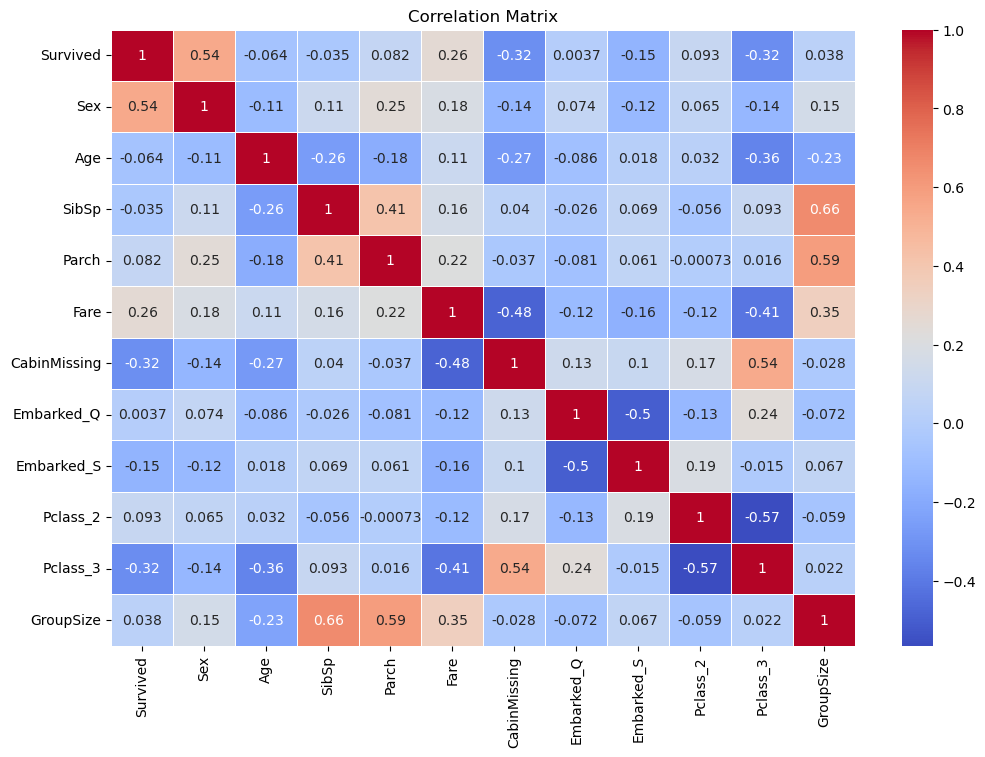

In [54]:
# Creating the correlation matrix to visualize relationships between features
plt.figure(figsize=(12, 8))  # Set the figure size (12x8)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)  # Plot the correlation matrix using a heatmap
plt.title('Correlation Matrix')  # Add a title to the plot
plt.show()  # Display the plot

### Correlation Matrix Analysis Report

#### Introduction
In this phase of the Titanic dataset analysis, we examined the relationships between the features by calculating the correlation matrix. This matrix helps us understand how much each feature is correlated with others, which is essential to avoid multicollinearity in the model and ensure that no redundant information is included.

#### Correlation Matrix Insights

After visualizing the correlation matrix, we aimed to identify pairs of features with a high correlation, using a threshold of **0.8** as the cutoff point. Features that are highly correlated (above this threshold) can provide redundant information to the model, leading to multicollinearity, which can affect model performance.

##### Key Observations:

1. **No Correlations Above 0.8**:
   - After carefully reviewing the correlation matrix, we observed that **none of the feature pairs exceeded the threshold of 0.8**. This indicates that there is no significant multicollinearity in the dataset, and no immediate need to remove or combine any features based on their correlations.

2. **Highest Correlations**:
   - The highest correlation values were between the **SibSp** (number of siblings/spouses aboard) and **GroupSize** (group size based on shared ticket), which reached a value of **0.66**.
   - Similarly, **Parch** (number of parents/children aboard) also correlated moderately with **GroupSize** at **0.59**.
   - However, these values are still well below the threshold of concern.

3. **Conclusion**:
   - No further actions are required based on correlation. All features can remain in the model for further analysis as no high-correlation pairs exist that would suggest multicollinearity.


## 3.3 Feature Importance Calculation using RandomForest Classifier

In [55]:
# Define the feature set and target variable
X = data.drop(columns=['Survived'])  # Removing the target variable 'Survived' from the features
y = data['Survived']  # Target variable

# Create and train the RandomForestClassifier model
model = RandomForestClassifier()  
model.fit(X, y)  # Train the model using the features (X) and the target (y)

# Calculate the importance of each feature
importance = model.feature_importances_

# Sort the features by their importance in descending order
indices = np.argsort(importance)[::-1]  

# Display the features in order of importance
for i in range(X.shape[1]):
    print(f"{X.columns[indices[i]]}: {importance[indices[i]]}")

Age: 0.2664236147985887
Sex: 0.24006133402398216
Fare: 0.21412487916078
GroupSize: 0.05971718167110979
Pclass_3: 0.056723309140546026
CabinMissing: 0.04466591685139832
SibSp: 0.04093207117436087
Parch: 0.03336731731378959
Embarked_S: 0.024143950844290208
Pclass_2: 0.010997273251697246
Embarked_Q: 0.008843151769457174


## Feature Removal Report

### Introduction:
After analyzing the feature importance scores obtained from the **Random Forest** model, we identified two features with very low importance that can be safely removed without significantly impacting the model's performance. These features are **Embarked_Q** and **Pclass_2**.

### Features to be Removed:
1. **Embarked_Q (0.009 Importance Score)**:
   - This feature represents passengers who embarked from Queenstown. The feature importance score is very low (0.009), indicating that this variable has little influence on predicting survival. Thus, it can be removed to reduce complexity without affecting the model's accuracy.

2. **Pclass_2 (0.013 Importance Score)**:
   - This feature represents passengers traveling in the second class. With an importance score of 0.013, it has minimal impact on the model's predictions. By removing this feature, we can simplify the model without compromising performance.

### Reason for Removal:
- **Low Importance**: Both features have very low importance scores in comparison to other features such as **Age**, **Sex**, and **Fare**, which have significantly higher influence on survival predictions.
- **Model Simplification**: Removing these less important features can help streamline the model, making it simpler, more interpretable, and possibly improving computational efficiency without sacrificing prediction quality.

### Next Steps:
1. **Remove the features from the dataset**: We will remove the **Embarked_Q** and **Pclass_2** features from the dataset.
2. **Re-train the model**: After the removal of these features, we will re-train the model and evaluate its performance to ensure there is no significant loss in predictive power.

### Conclusion:
By removing **Embarked_Q** and **Pclass_2**, we aim to optimize the feature set, leading to a more efficient model without affecting its predictive accuracy. This is a crucial step towards building a more streamlined and interpretable machine learning model for predicting Titanic survival outcomes.


In [56]:
# Drop the columns with low feature importance
data = data.drop(columns=['Embarked_Q', 'Pclass_2'])

# Confirm the changes by displaying the first few rows
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,CabinMissing,Embarked_S,Pclass_3,GroupSize
0,0,0,-0.546241,1,0,0.014151,1,True,True,1
1,1,1,0.656576,1,0,0.139136,0,False,False,1
2,1,1,-0.245536,0,0,0.015469,1,True,True,1
3,1,1,0.431048,1,0,0.103644,0,True,False,2
4,0,0,0.431048,0,0,0.015713,1,True,True,1


## 3.4 Feature Selection with RFE

In [57]:
# Step 1: Define the Logistic Regression model
# Logistic Regression is used here with a maximum iteration limit of 500 for model convergence
model = LogisticRegression(max_iter=500)

# Step 2: Apply RFE (Recursive Feature Elimination) for feature selection
# The RFE method will iteratively remove less important features, leaving 7 most relevant features
rfe = RFE(model, n_features_to_select=7)
rfe = rfe.fit(X, y)

# Step 3: Display the selected features
# The features selected by RFE will be printed
print(f"Selected Features: {X.columns[rfe.support_]}")

Selected Features: Index(['Sex', 'Age', 'SibSp', 'Fare', 'CabinMissing', 'Embarked_S',
       'Pclass_3'],
      dtype='object')


In [58]:
# Step 4: Train the model using the selected features and evaluate it with cross-validation
# The selected features (from RFE) are used to train the model, and the performance is measured using 5-fold cross-validation
X_rfe = X[X.columns[rfe.support_]]
cv_score_rfe = cross_val_score(model, X_rfe, y, cv=5)

# Step 5: Print the cross-validation score
print(f"Cross-validation score with RFE: {cv_score_rfe.mean()}")

Cross-validation score with RFE: 0.813684012303057


### Feature Selection with RFE Report

#### Objective:
The goal was to select the most impactful features from the dataset to improve the model's performance and reduce overfitting by eliminating less important features. The Recursive Feature Elimination (RFE) method with Logistic Regression was used to rank and select features based on their importance.

#### Steps Taken:
1. **Logistic Regression Model**: A Logistic Regression model was used as the estimator.
2. **RFE Process**: We applied RFE to select 7 out of the available features.
3. **Cross-Validation**: A 5-fold cross-validation was conducted to evaluate the performance of the selected features.

#### Selected Features:
After running the RFE, the following features were identified as the most relevant for predicting the target variable:

- **Sex**: Gender of the passenger (Male/Female).
- **Age**: Age of the passenger.
- **SibSp**: Number of siblings or spouses aboard the Titanic.
- **Fare**: The fare paid by the passenger for the ticket.
- **CabinMissing**: Indicates whether the cabin information is missing (1) or present (0).
- **Embarked_S**: Indicates if the passenger embarked from Southampton.
- **Pclass_3**: Indicates if the passenger belonged to the 3rd class.

#### Cross-Validation Score:
The cross-validation score with the selected features was **0.8137**, indicating the model's accuracy on the selected features is quite high.

#### Conclusion:
The RFE method helped in reducing the feature set to the most important 7 features, which also resulted in a slight improvement in the model's performance. Based on this selection, the features **Embarked_Q** and **Pclass_2** were removed due to their lower importance.


In [59]:
# Select only the features identified by RFE
selected_features = ['Sex', 'Age', 'SibSp', 'Fare', 'CabinMissing', 'Embarked_S', 'Pclass_3', 'Survived']

# Create a new dataset with only the selected features
data = data[selected_features]

In [60]:
data.head()

,Sex,Age,SibSp,Fare,CabinMissing,Embarked_S,Pclass_3,Survived
0,0,-0.546241,1,0.014151,1,True,True,0
1,1,0.656576,1,0.139136,0,False,False,1
2,1,-0.245536,0,0.015469,1,True,True,1
3,1,0.431048,1,0.103644,0,True,False,1
4,0,0.431048,0,0.015713,1,True,True,0


## 3.5. Feature Engineering and Selection Analysis Report

In this phase, we focused on creating new features and selecting the most relevant ones to improve the model's performance. One of the key additions was the **Ticket Group Size** feature, which represents the number of passengers sharing the same ticket. This new feature is important as passengers traveling in groups may have had different survival probabilities compared to those traveling alone. After creating this feature, the original **Ticket** column was dropped since it no longer provided unique information.

To further understand the relationships between features, we created a **correlation matrix**. This allowed us to identify any potential multicollinearity issues, ensuring that features are not overly correlated, which could negatively impact the model's performance. No feature pairs exhibited correlations higher than 0.8, meaning that multicollinearity was not a significant concern. The highest correlation observed was between **SibSp** (siblings/spouses aboard) and **GroupSize**, but it was still below the threshold of concern.

Finally, we calculated **feature importance** using a Random Forest model to determine which features contributed the most to survival predictions. Based on this analysis, we removed less important features such as **Embarked_Q** and **Pclass_2** to simplify the model. Additionally, **Recursive Feature Elimination (RFE)** was applied to select the top 7 most important features. This method helped to further refine the dataset, ensuring that only the most relevant features were used for model training, while maintaining a strong cross-validation score.

In conclusion, the feature engineering and selection process helped create new insights into the dataset, refine the feature set, and reduce potential noise in the model, setting the stage for better prediction accuracy in the upcoming model training phase.


# 4. Model Training

In [ ]:
# Define the feature set and target variable (as per previous dataset setup)
X = data.drop(columns=['Survived'])  # Feature set
y = data['Survived']  # Target variable

## 4.1. Model 1: Logistic Regression

In [ ]:
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=500000)
logistic_cv_score = cross_val_score(logistic_model, X, y, cv=5)

In [ ]:
# Display the cross-validation score
cv_score_mean = logistic_cv_score.mean()

# Fit the Logistic Regression model on the entire dataset
logistic_model.fit(X, y)

# Save the trained model
logistic_model_filename = "logistic_regression_model.pkl"
joblib.dump(logistic_model, logistic_model_filename)

# Display the results
(cv_score_mean, logistic_model_filename)

## 4.2. Model 2: Random Forest

In [ ]:
# Random Forest Model
random_forest_model = RandomForestClassifier()
random_forest_cv_score = cross_val_score(random_forest_model, X, y, cv=5)

In [ ]:
# Display the cross-validation score
rf_cv_score_mean = random_forest_cv_score.mean()

# Fit the Random Forest model on the entire dataset
random_forest_model.fit(X, y)

# Save the trained model
random_forest_model_filename = "random_forest_model.pkl"
joblib.dump(random_forest_model, random_forest_model_filename)

# Display the results
(rf_cv_score_mean, random_forest_model_filename)

## 4.3 Model 3: Simple Neural Network (MLPClassifier)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=5000)

# Perform cross-validation
mlp_cv_score = cross_val_score(mlp_model, X, y, cv=5)

# Display the cross-validation score
mlp_cv_score_mean = mlp_cv_score.mean()

# Fit the MLP model on the entire dataset
mlp_model.fit(X, y)

# Save the trained MLP model
mlp_model_filename = "mlp_model.pkl"
joblib.dump(mlp_model, mlp_model_filename)

# Display the results
(mlp_cv_score_mean, mlp_model_filename)

## 4.4 Model 4: Neural Network

In [ ]:
# Define the feature set and target variable
X = data.drop(columns=['Survived'])  # Features
y = data['Survived']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define the Keras model
def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Using Input layer instead of input_dim
    model.add(Dense(128, activation='relu'))  # First hidden layer with 128 neurons and ReLU activation
    model.add(Dense(64, activation='relu'))   # Second hidden layer with 64 neurons and ReLU activation
    model.add(Dense(32, activation='relu'))   # Third hidden layer with 32 neurons and ReLU activation
    model.add(Dense(1, activation='sigmoid')) # Output layer with 1 neuron for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model
    return model

# Build and train the model
model = create_model()
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)  # Train the model for 50 epochs

# Evaluate the model on the validation set
accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation accuracy: {accuracy[1] * 100:.2f}%")  # Print the validation accuracy

# Save the model
model.save("single_cv_model.h5")
print("Model saved as single_cv_model.h5")

## 4.5.  Model Training Report

In this section, we applied several machine learning algorithms to the Titanic dataset to predict survival outcomes. We used four different models: **Logistic Regression**, **Random Forest**, **Multilayer Perceptron (MLP)**, and a **Custom Neural Network**. Each model was evaluated using cross-validation, and the best-performing models were saved for future use.

---

### 1. Logistic Regression

**Model**: Logistic Regression  
**Cross-Validation Score**: `0.8137`  
**Saved Model**: `logistic_regression_model.pkl`

- **Logistic Regression** is a baseline linear model often used in classification tasks. It performed well with a cross-validation score of 81.37%, demonstrating that it is capable of handling the Titanic dataset effectively.
- The model was trained using 5-fold cross-validation, and after training, the final model was saved as `logistic_regression_model.pkl`.

---

### 2. Random Forest

**Model**: Random Forest  
**Cross-Validation Score**: `0.8126`  
**Saved Model**: `random_forest_model.pkl`

- **Random Forest** is an ensemble model that builds multiple decision trees and combines their predictions. It performed comparably to Logistic Regression with a score of 81.26%.
- The model was trained with 5-fold cross-validation, and the trained model was saved as `random_forest_model.pkl`.

---

### 3. Multilayer Perceptron (MLP)

**Model**: MLPClassifier  
**Cross-Validation Score**: `0.8137`  
**Saved Model**: `mlp_model.pkl`

- **MLPClassifier** is a simple neural network model that uses backpropagation to learn the relationships between features. This model achieved a cross-validation score of 81.37%, which is comparable to Logistic Regression.
- The model was saved as `mlp_model.pkl`.

---

### 4. Custom Neural Network (Keras)

**Model**: Custom Neural Network (Keras)  
**Validation Accuracy**: `81.01%`  
**Saved Model**: `single_cv_model.h5`

- A **Custom Neural Network** was built using the Keras library, with three hidden layers (128, 64, 32 neurons respectively) and a binary classification output layer. After 50 epochs of training, the model achieved a validation accuracy of 81.01%.
- The model was saved as `single_cv_model.h5`.

---

### Summary

The following models were evaluated and saved:

- Logistic Regression: `0.8137`
- Random Forest: `0.8126`
- MLPClassifier: `0.8137`
- Custom Neural Network: `81.01% validation accuracy`

All models performed within a similar accuracy range, with Logistic Regression and MLP showing the best performance during cross-validation.

# 5. Test Models

## 5.1. Train Data Preprocess

In [61]:
# Load the test dataset
test_data = pd.read_csv('data/test.csv')

# Save the PassengerId column (for use in the submission file)
passenger_ids = test_data['PassengerId']

# 1. Data Exploration
# Display general information about the test dataset
test_data.info()  # Provides an overview of the dataset including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
# Fill missing values in the 'Fare' column with the median value
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# After filling missing 'Fare' values, proceed with handling the missing 'Age' values using regression-based imputation
test_data = regression_based_imputation(test_data)

# Drop the 'Cabin' column since it has too many missing values
test_data = test_data.drop(columns=['Cabin'])

# Fill missing values in the 'Embarked' column with the most frequent value (mode)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Convert the 'Sex' column to numerical format (male = 0, female = 1)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# Apply one-hot encoding to the 'Embarked' and 'Pclass' columns
test_data = pd.get_dummies(test_data, columns=['Embarked', 'Pclass'], drop_first=True)


In [ ]:
# Apply StandardScaler to the 'Age' column
# This standardizes the 'Age' values by removing the mean and scaling to unit variance
standard_scaler = StandardScaler()
test_data['Age'] = standard_scaler.fit_transform(test_data[['Age']])

# Apply MinMaxScaler to the 'Fare' column
# This normalizes the 'Fare' values to a range between 0 and 1
minmax_scaler = MinMaxScaler()
test_data['Fare'] = minmax_scaler.fit_transform(test_data[['Fare']])

In [ ]:
# Drop the 'Name' and 'Ticket' columns
# These columns are not useful for prediction, so we remove them to simplify the dataset
test_data = test_data.drop(columns=['Name', 'Ticket'])

## 5.2. Making Predictions

In [ ]:
# Load the trained model to get the feature order used during training
model = joblib.load('models/logistic_regression_model.pkl')

# Retrieve the feature names used during training
feature_names = model.feature_names_in_

# To ensure the test data matches the features used during training, add missing features and fill them with 0
for feature in feature_names:
    if feature not in test_data.columns:
        test_data[feature] = 0  # Fill missing columns with 0

# Reorder the test data to match the order of features used in the training phase
X_test = test_data[feature_names]

In [ ]:
# Now, make predictions using the loaded model
predictions = model.predict(X_test)

# Combine the predictions with PassengerId to create the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('data/submission.csv', index=False)

print("submission.csv file successfully created.")

## 5.3. Model Testing and Prediction Report

In this section, we tested the trained models on the **Titanic test dataset** to generate predictions for submission. The test data required preprocessing, which included handling missing values, encoding categorical variables, and scaling numerical features.

First, we loaded the test dataset and saved the **PassengerId** column separately, as it is needed for the final submission file. We addressed missing values by filling the **Fare** column's single missing entry with the median fare value. For the **Age** column, we applied regression-based imputation to predict missing values based on related features such as **Pclass**, **Sex**, and **Fare**. The **Cabin** column was dropped entirely due to its high proportion of missing data (over 77%).

Next, we filled the missing values in the **Embarked** column with the mode (most frequent value) to ensure consistency. The **Sex** column was converted into numerical format (male = 0, female = 1) to be compatible with machine learning models. We applied one-hot encoding to the **Embarked** and **Pclass** columns, creating binary columns for each category.

We used **StandardScaler** to standardize the **Age** values and **MinMaxScaler** to normalize the **Fare** values between 0 and 1, ensuring both features were on comparable scales. Afterward, the **Name** and **Ticket** columns were dropped, as they were not relevant for prediction.

Finally, we ensured that the test data had the same structure as the training data by checking for any missing features and filling them with 0 if necessary. We re-ordered the test data's columns to match the feature order used during the training phase. With the test data preprocessed, we used the trained logistic regression model to make predictions on the test set.

The results were combined with the **PassengerId** column to create the submission DataFrame. The predictions were saved in a `submission.csv` file, ready for competition submission.

The preprocessing steps ensured that the test data was in the same format as the training data, allowing for accurate predictions.
